<a href="https://colab.research.google.com/github/odibo1/The-Ricardian-Equivalence/blob/master/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ricardian Equivalance Theory

Ricardian Equivalence theory proposes that there is a relationship between a country's debt and it's economic growth. The logic follows that as citizens observe their country's debt increase, they will reduce their consumption in anticipation of a future tax increase.

To investigate this theory, I will be looking at time-series data for Debt-to-GDP and GDP growth for all available countries from 1980 - 2015.

This study should help answer this main question:
- Is there a general relationship between public debt and economic performance
  - How do country's perform with low public and debt and high public debt


In [0]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


###Data Entry and Cleaning


In [0]:
#import GDP growth dataset

df_GDP = pd.read_csv("GDP growth(1).csv", encoding = "ISO-8859-1") 
#remove empty columns, replace non entries with NaN, rename the year column as year
df_GDP = df_GDP.drop(df_GDP.filter(regex='Unnamed').columns, axis=1).replace("no data", np.NaN).rename(columns={"Real GDP growth (Annual percent change)":"Year"})
df_GDP

,Year,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,"China, People's Republic of",Colombia,Comoros,"Congo, Dem. Rep. of the",...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,Africa (Region),Asia and Pacific,Australia and New Zealand,Caribbean,Central America,Central Asia and the Caucasus,East Asia,Eastern Europe,Europe,Middle East (Region),North Africa,North America,Pacific Islands,South America,South Asia,Southeast Asia,Sub-Saharan Africa (Region),Western Europe,Western Hemisphere (Region),ASEAN-5,Advanced economies,Emerging and Developing Asia,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
0,1980,NaN,2.7,-5.4,2.4,8.2,0.7,NaN,NaN,2.9,2.3,NaN,7.1,7.5,3.1,4.4,NaN,4.4,5.0,9.3,5.0,0.6,NaN,12.0,9.2,NaN,5.7,4.0,-6.8,5.3,NaN,9.9,2.2,-3.0,-6.0,7.9,7.9,4.4,7.4,2.4,...,6.0,NaN,5.5,-4.9,-3.5,NaN,3.9,NaN,NaN,4.5,2.6,6.2,1.0,NaN,4.2,-0.9,1.4,-3.9,0.4,1.0,-1.9,5.6,5.3,6.9,NaN,1.7,2.2,6.7,1.3,6.4,-0.8,3.3,NaN,1.8,6.5,0.9,-2.2,3.7,NaN,2.1
1,1981,NaN,5.7,3.0,-4.4,3.8,-5.7,NaN,NaN,4.1,-0.1,NaN,-2.9,2.8,5.6,-1.9,NaN,-0.3,0.2,1.9,13.6,0.3,NaN,8.2,-4.4,NaN,5.3,2.7,12.2,8.4,NaN,17.1,3.5,13.0,-10.8,6.2,5.1,2.3,5.5,0.9,...,1.9,NaN,4.4,-1.3,5.8,NaN,6.6,NaN,NaN,5.2,4.0,3.2,1.0,NaN,4.8,-2.6,0.1,-0.8,-3.9,3.3,2.4,-2.4,6.0,6.5,NaN,0.3,2.0,6.2,2.0,5.9,-0.5,1.6,NaN,0.1,0.8,2.0,-1.1,4.2,NaN,1.9
2,1982,NaN,2.9,6.4,0.0,-0.1,-3.1,NaN,NaN,0.1,1.9,NaN,6.3,6.4,3.2,-4.9,4,0.6,-7.6,1.7,8.2,-3.9,NaN,15.9,0.6,NaN,4.2,1.4,-1.1,2.8,NaN,7.6,-3.2,-3.6,5.4,-13.6,9.0,0.9,4.1,-0.5,...,-9.3,NaN,2.0,2.6,8.2,NaN,-2.9,NaN,NaN,4.2,0.5,1.7,-2.7,NaN,4.8,0.5,0.7,-4.7,5.4,-1.8,0.3,-0.4,4.1,4.1,NaN,0.7,-1.4,3.9,0.2,5.1,1.4,1.2,NaN,0.6,-0.5,-0.1,-1.0,2.1,NaN,0.6
3,1983,NaN,1.1,5.4,4.2,5.4,3.7,NaN,NaN,-0.5,2.8,NaN,6.8,7.0,4.6,0.5,4.3,0.3,6.1,-2.0,7.3,-4.0,NaN,10.8,-3.4,NaN,3.0,-1.2,3.7,9.5,NaN,6.8,2.6,-6.0,15.7,-2.8,10.8,1.6,3.1,1.4,...,-3.3,NaN,3.0,-9.9,7.1,NaN,-1.1,NaN,NaN,5.5,-0.4,0.9,-0.3,NaN,6.0,4.4,2.0,0.8,3.5,3.5,1.2,-2.8,6.8,4.6,NaN,1.8,2.1,4.4,3.2,7.0,4.5,2.1,NaN,1.7,-2.8,3.3,1.9,4.0,NaN,2.8
4,1984,NaN,2.0,5.6,6.0,10.2,2.0,NaN,NaN,6.3,0.3,NaN,2.4,4.2,4.2,3.6,3,2.5,11.3,0.4,7.6,-0.2,NaN,6.5,5.3,NaN,4.6,1.6,0.2,3.8,NaN,7.5,5.9,9.9,5.3,5.9,15.2,3.4,4.2,4.8,...,-1.1,NaN,9.6,5.2,8.4,NaN,-1.7,NaN,NaN,6.5,6.4,0.2,2.2,NaN,7.7,2.8,2.5,-2.5,3.3,6.7,3.7,4.4,4.0,4.9,NaN,2.5,6.1,4.7,4.9,7.5,4.1,4.0,NaN,2.5,3.9,5.0,-0.5,6.6,NaN,4.5
5,1985,NaN,-1.5,5.6,3.5,7.6,-7.0,NaN,NaN,5.5,2.2,NaN,4.1,-0.9,3.7,1.1,1.7,1.7,-1.4,4.3,4.3,-1.7,NaN,7.7,7.9,NaN,1.8,11.3,11.8,8.6,NaN,8.1,4.7,3.7,7.9,2.0,13.5,3.1,2.9,0.5,...,1.5,NaN,1.0,0.9,5.6,NaN,1.2,NaN,NaN,5.9,4.8,-0.9,0.7,NaN,7.3,1.6,2.5,-2.8,5.3,4.0,1.3,4.0,5.7,1.7,NaN,2.6,3.9,1.8,3.7,6.7,2.4,3.5,NaN,2.2,3.3,3.8,0.5,4.3,NaN,3.6
6,1986,NaN,5.6,-0.2,2.9,11.5,7.1,NaN,NaN,2.4,2.3,NaN,2.6,0.5,4.0,5.1,3.6,1.8,7.3,2.7,8.0,-2.6,NaN,8.6,7.5,-2.8,5.3,8.0,3.2,2.9,NaN,6.8,2.1,7.2,6.0,5.6,8.9,5.8,2.2,4.7,...,8.9,NaN,-0.1,6.1,3.4,NaN,1.7,NaN,NaN,5.4,2.4,2.8,1.4,NaN,5.8,3.1,2.7,1.8,0.4,2.7,5.6,7.1,4.9,5.0,NaN,2.7,3.7,5.3,3.3,6.2,4.4,4.3,NaN,2.7,4.3,3.1,1.9,5.6,NaN,3.7
7,1987,NaN,-0.8,-0.7,4.1,6.6,2.5,NaN,NaN,4.9,1.7,NaN,3.7,-1.2,2.9,2.6,2.8,2.3,22.0,-2.1,20.2,2.5,NaN,14.9,3.6,0.3,4.7,-0.2,5.5,4.3,NaN,-2.2,4.1,0.0,3.6,6.6,11.7,5.4,2.2,2.7,...,7.9,NaN,-2.9,4.8,2.5,NaN,1.5,NaN,NaN,6.8,4.5,5.2,2.7,NaN,7.7,2.5,2.9,0.7,-0.8,3.3,0.1,3.8,4.1,6.5,NaN,3.0,3.5,6.3,3.8,7.2,5.1,4.2,NaN,2.6,3.3,3.5,0.6,6.5,NaN,3.9
8,1988,NaN,-1.4,-1.9,6.1,5.2,-2.0,NaN,NaN,4.3,1.0,NaN,2.3,6.0,2.4,3.5,5.3,4.7,10.9,3.4,15.1,2.9,NaN,23.4,0.3,-0.4,2.4,5.8,5.0,6.0,9.6,-7.9,4.4,1.7,7.5,7.3,11.2,4.

In [0]:
#import Debt-to-GDP ratio database
df_Debt = pd.read_csv("Public Debt(1).csv", encoding = "ISO-8859-1")
#remove empty rows and rename Year column
df_Debt = df_Debt.rename(columns={"Unnamed: 0":"Year"})
df_Debt = df_Debt[df_Debt["Year"].notna()]
df_Debt

,Year,Afghanistan,Albania,Algeria,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,"Congo, Republic of",...,Slovak Republic,Slovenia,Solomon Islands,South Africa,South Sudan,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,St. Vincent and the Grenadines,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan Province of China,Tajikistan,Tanzania,Thailand,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1966.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.23,14.07,NaN,NaN,NaN,NaN,NaN,NaN,55.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.90,NaN,NaN,NaN,57.01,NaN,NaN,NaN,NaN,9.15,NaN,NaN,...,NaN,NaN,NaN,45.71,NaN,10.95,41.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.81,NaN,NaN,14.18,NaN,33.36,NaN,NaN,NaN,NaN,NaN,91.95,40.53,NaN,NaN,NaN,5.84,NaN,NaN,NaN,28.68
2,1967.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.25,15.63,NaN,NaN,NaN,NaN,NaN,NaN,54.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.31,NaN,NaN,NaN,56.96,NaN,NaN,NaN,NaN,9.69,NaN,NaN,...,NaN,NaN,NaN,41.10,NaN,10.95,43.06,NaN,NaN,NaN,NaN,NaN,NaN,16.12,NaN,NaN,NaN,NaN,NaN,14.99,NaN,NaN,NaN,NaN,33.32,NaN,NaN,NaN,NaN,NaN,89.15,39.11,NaN,NaN,NaN,6.74,NaN,NaN,NaN,29.73
4,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.21,16.76,NaN,8.70,NaN,NaN,NaN,NaN,54.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.46,NaN,NaN,NaN,56.26,NaN,NaN,NaN,NaN,9.95,NaN,NaN,...,NaN,NaN,NaN,42.67,NaN,11.03,45.95,NaN,NaN,NaN,NaN,NaN,NaN,17.63,NaN,NaN,NaN,NaN,NaN,15.12,NaN,NaN,15.23,NaN,33.22,NaN,NaN,NaN,NaN,NaN,88.55,38.13,NaN,NaN,NaN,7.84,NaN,NaN,NaN,27.34
6,1969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.73,16.80,NaN,8.90,NaN,NaN,NaN,NaN,51.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.74,NaN,NaN,NaN,54.36,NaN,NaN,NaN,NaN,10.78,NaN,NaN,...,NaN,NaN,NaN,44.36,NaN,11.32,43.44,NaN,NaN,NaN,NaN,NaN,NaN,17.65,NaN,NaN,NaN,NaN,NaN,16.80,NaN,NaN,16.22,NaN,33.15,NaN,NaN,NaN,NaN,NaN,82.84,35.90,NaN,NaN,NaN,9.91,NaN,NaN,NaN,51.90
8,1970.0,NaN,NaN,27.04,NaN,NaN,NaN,12.87,NaN,33.91,16.17,NaN,9.30,NaN,NaN,16.11,NaN,47.49,NaN,6.25,NaN,63.86,NaN,NaN,NaN,NaN,NaN,NaN,8.46,NaN,NaN,12.35,56.68,20.27,15.96,36.80,NaN,NaN,NaN,36.44,...,NaN,NaN,NaN,43.30,NaN,11.54,40.44,NaN,NaN,NaN,NaN,NaN,16.90,28.96,38.88,48.53,NaN,NaN,16.75,20.07,NaN,NaN,22.08,41.76,39.84,NaN,NaN,16.71,NaN,NaN,73.24,35.68,19.95,NaN,NaN,NaN,NaN,NaN,57.27,46.73
10,1971.0,NaN,NaN,31.83,NaN,NaN,NaN,11.52,NaN,31.33,14.41,NaN,10.25,NaN,NaN,17.12,NaN,45.77,NaN,6.71,NaN,65.72,NaN,NaN,NaN,NaN,NaN,NaN,6.92,NaN,NaN,15.98,57.83,20.38,17.82,47.56,NaN,NaN,NaN,37.94,...,NaN,NaN,NaN,41.09,NaN,10.53,44.01,NaN,NaN,NaN,NaN,27.10,15.32,29.35,38.66,50.86,NaN,NaN,76.88,23.67,NaN,NaN,16.47,39.19,34.42,NaN,NaN,19.21,NaN,NaN,65.55,36.17,22.33,NaN,NaN,NaN,NaN,NaN,54.96,41.48
12,1972.0,NaN,NaN,27.51,NaN,NaN,NaN,9.35,NaN,29.74,13.42,NaN,8.98,NaN,NaN,16.32,NaN,44.84,NaN,5.41,NaN,77.67,NaN,45.78,NaN,NaN,NaN,NaN,7.54,NaN,NaN,14.54,56.62,20.53,12.81,63.72,NaN,20.77,NaN,35.09,...,NaN,NaN,NaN,41.12,NaN,10.72,45.12,NaN,NaN,NaN,NaN,30.00,14.76,29.20,38.04,48.15,NaN,NaN,75.45,27.62,NaN,NaN,17.87,34.13,30.05,NaN,NaN,21.95,NaN,NaN,62.04,35.14,26.08,NaN,NaN,7.22,NaN,NaN,58.24,38.76
14,1973.0,NaN,NaN,33.39,NaN,NaN,NaN,13.33,NaN,26.47,13.36,NaN,9.35,NaN,NaN,15.81,NaN,42.38,NaN,5.58,NaN,80.92,NaN,45.80,NaN,NaN,NaN,NaN,7.82,NaN,NaN,14.74,52.27,24.72,13.86,100.86,NaN,19.81,NaN,34.17,...,NaN,NaN,NaN,38.19,NaN,9.92,43.82,NaN,NaN,NaN,NaN,27.97,17.79,28.49,36.95,39.02,NaN,NaN,75.30,24.66,NaN,NaN,17.54,33.76,23.05,NaN,NaN,25.15,NaN,1.01,54.56,33.66,21.54,NaN,NaN,6.93,NaN,NaN,60.10,34.26
16,1974.0,NaN,NaN,32.52,NaN,NaN,NaN,13.81,NaN,23.01,12.81,NaN,13.50,3.07,16.34,NaN,NaN,38.84,NaN,6.95,NaN,52.

In [0]:
#create world debt-to-GDP ratio column
df_Debt.set_index("Year")
df_Debt["World Average"] = df_Debt.mean(numeric_only=True, axis=1)
df_Debt["World Average"]

0     69.242000
2     66.811250
4     64.444314
6     65.270392
8     50.176591
10    49.329140
12    49.000000
14    45.981509
16    45.046574
18    46.492883
20    48.313571
22    52.208938
24    55.685625
26    56.732389
28    57.686325
30    60.829244
32    68.502602
34    76.576774
36    78.319762
38    82.915000
40    85.362846
42    89.717165
44    86.152734
46    87.123465
48    90.456484
50    90.141418
52    92.578462
54    90.001007
56    88.843571
58    83.182515
60    79.750964
62    76.014583
64    82.781771
66    85.097457
68    83.208249
70    82.073462
72    82.969615
74    80.888729
76    77.326649
78    70.158011
80    61.838617
82    55.138717
84    55.094362
86    57.834043
88    57.143404
90    57.736898
92    58.666117
94    60.285957
96    62.132340
98    65.180638
Name: World Average, dtype: float64

In [0]:
#check data types 
df_GDP.dtypes

Year                               int64
Afghanistan                       object
Albania                          float64
Algeria                          float64
Angola                           float64
                                  ...   
Major advanced economies (G7)    float64
Middle East and Central Asia     float64
Other advanced economies         float64
Sub-Saharan Africa                object
World                            float64
Length: 227, dtype: object

In [0]:
#check data types
df_Debt.dtypes

Year               int64
Afghanistan      float64
Albania          float64
Algeria          float64
Angola           float64
                  ...   
Vietnam          float64
Yemen            float64
Zambia           float64
Zimbabwe         float64
World Average    float64
Length: 193, dtype: object

In [0]:
#change all data types in GDP data to float
for col in df_GDP.columns:
    if df_GDP[col].dtypes != "float64":
        df_GDP[col] = pd.to_numeric(df_GDP[col])        
df_GDP.dtypes

Year                               int64
Afghanistan                      float64
Albania                          float64
Algeria                          float64
Angola                           float64
                                  ...   
Major advanced economies (G7)    float64
Middle East and Central Asia     float64
Other advanced economies         float64
Sub-Saharan Africa               float64
World                            float64
Length: 227, dtype: object

#####Find countries were data is not available

In [0]:
#find countries with Debt data that do not have GDP data
for x in df_Debt.columns:
    if x not in df_GDP.columns:
        print(x)

Anguilla
China
Congo, Republic of
Democratic Republic of the Congo
Eastern Caribbean Currency Union
Korea
Montenegro, Rep. of
North Macedonia, Republic of
Russia
South Sudan
St. Kitts and Nevis
St. Lucia
St. Vincent and the Grenadines
Swaziland


In [0]:
#find countries with GDP data that do not have Debt data
for x in df_GDP.columns:
    if x not in df_Debt.columns:
        print(x)

Aruba
China, People's Republic of
Congo, Dem. Rep. of the
Congo, Republic of 
Eswatini
Korea, Republic of
Macao SAR
Montenegro
Nauru
North Macedonia 
Palau
Russian Federation
Saint Kitts and Nevis
Saint Lucia
Saint Vincent and the Grenadines
Somalia
South Sudan, Republic of
Timor-Leste
Africa (Region)
Asia and Pacific
Australia and New Zealand
Caribbean
Central America
Central Asia and the Caucasus
East Asia
Eastern Europe 
Europe
Middle East (Region)
North Africa
North America
Pacific Islands 
South America
South Asia
Southeast Asia
Sub-Saharan Africa (Region) 
Western Europe
Western Hemisphere (Region)
ASEAN-5
Advanced economies
Emerging and Developing Asia
Emerging and Developing Europe
Emerging market and developing economies
European Union
Latin America and the Caribbean
Major advanced economies (G7)
Middle East and Central Asia
Other advanced economies
Sub-Saharan Africa
World


#####Some countries have different names in 2 datasets. I make the names uniform in this section

In [0]:
#rename columns in GDP data
df_GDP = df_GDP.rename(columns={"China, People's Republic of":"China","Congo, Dem. Rep. of the":"Democratic Republic of the Congo","Korea, Republic of":"Korea","Russian Federation":"Russia","South Sudan, Republic of":"South Sudan", "Saint Kitts and Nevis":"St. Kitts and Nevis", "Saint Lucia":"St. Lucia", "Saint Vincent and the Grenadines":"St. Vincent and the Grenadines"})
df_GDP

,Year,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Democratic Republic of the Congo,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,Africa (Region),Asia and Pacific,Australia and New Zealand,Caribbean,Central America,Central Asia and the Caucasus,East Asia,Eastern Europe,Europe,Middle East (Region),North Africa,North America,Pacific Islands,South America,South Asia,Southeast Asia,Sub-Saharan Africa (Region),Western Europe,Western Hemisphere (Region),ASEAN-5,Advanced economies,Emerging and Developing Asia,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
0,1980,NaN,2.7,-5.4,2.4,8.2,0.7,NaN,NaN,2.9,2.3,NaN,7.1,7.5,3.1,4.4,NaN,4.4,5.0,9.3,5.0,0.6,NaN,12.0,9.2,NaN,5.7,4.0,-6.8,5.3,NaN,9.9,2.2,-3.0,-6.0,7.9,7.9,4.4,7.4,2.4,...,6.0,NaN,5.5,-4.9,-3.5,NaN,3.9,NaN,NaN,4.5,2.6,6.2,1.0,NaN,4.2,-0.9,1.4,-3.9,0.4,1.0,-1.9,5.6,5.3,6.9,NaN,1.7,2.2,6.7,1.3,6.4,-0.8,3.3,NaN,1.8,6.5,0.9,-2.2,3.7,NaN,2.1
1,1981,NaN,5.7,3.0,-4.4,3.8,-5.7,NaN,NaN,4.1,-0.1,NaN,-2.9,2.8,5.6,-1.9,NaN,-0.3,0.2,1.9,13.6,0.3,NaN,8.2,-4.4,NaN,5.3,2.7,12.2,8.4,NaN,17.1,3.5,13.0,-10.8,6.2,5.1,2.3,5.5,0.9,...,1.9,NaN,4.4,-1.3,5.8,NaN,6.6,NaN,NaN,5.2,4.0,3.2,1.0,NaN,4.8,-2.6,0.1,-0.8,-3.9,3.3,2.4,-2.4,6.0,6.5,NaN,0.3,2.0,6.2,2.0,5.9,-0.5,1.6,NaN,0.1,0.8,2.0,-1.1,4.2,NaN,1.9
2,1982,NaN,2.9,6.4,0.0,-0.1,-3.1,NaN,NaN,0.1,1.9,NaN,6.3,6.4,3.2,-4.9,4.0,0.6,-7.6,1.7,8.2,-3.9,NaN,15.9,0.6,NaN,4.2,1.4,-1.1,2.8,NaN,7.6,-3.2,-3.6,5.4,-13.6,9.0,0.9,4.1,-0.5,...,-9.3,NaN,2.0,2.6,8.2,NaN,-2.9,NaN,NaN,4.2,0.5,1.7,-2.7,NaN,4.8,0.5,0.7,-4.7,5.4,-1.8,0.3,-0.4,4.1,4.1,NaN,0.7,-1.4,3.9,0.2,5.1,1.4,1.2,NaN,0.6,-0.5,-0.1,-1.0,2.1,NaN,0.6
3,1983,NaN,1.1,5.4,4.2,5.4,3.7,NaN,NaN,-0.5,2.8,NaN,6.8,7.0,4.6,0.5,4.3,0.3,6.1,-2.0,7.3,-4.0,NaN,10.8,-3.4,NaN,3.0,-1.2,3.7,9.5,NaN,6.8,2.6,-6.0,15.7,-2.8,10.8,1.6,3.1,1.4,...,-3.3,NaN,3.0,-9.9,7.1,NaN,-1.1,NaN,NaN,5.5,-0.4,0.9,-0.3,NaN,6.0,4.4,2.0,0.8,3.5,3.5,1.2,-2.8,6.8,4.6,NaN,1.8,2.1,4.4,3.2,7.0,4.5,2.1,NaN,1.7,-2.8,3.3,1.9,4.0,NaN,2.8
4,1984,NaN,2.0,5.6,6.0,10.2,2.0,NaN,NaN,6.3,0.3,NaN,2.4,4.2,4.2,3.6,3.0,2.5,11.3,0.4,7.6,-0.2,NaN,6.5,5.3,NaN,4.6,1.6,0.2,3.8,NaN,7.5,5.9,9.9,5.3,5.9,15.2,3.4,4.2,4.8,...,-1.1,NaN,9.6,5.2,8.4,NaN,-1.7,NaN,NaN,6.5,6.4,0.2,2.2,NaN,7.7,2.8,2.5,-2.5,3.3,6.7,3.7,4.4,4.0,4.9,NaN,2.5,6.1,4.7,4.9,7.5,4.1,4.0,NaN,2.5,3.9,5.0,-0.5,6.6,NaN,4.5
5,1985,NaN,-1.5,5.6,3.5,7.6,-7.0,NaN,NaN,5.5,2.2,NaN,4.1,-0.9,3.7,1.1,1.7,1.7,-1.4,4.3,4.3,-1.7,NaN,7.7,7.9,NaN,1.8,11.3,11.8,8.6,NaN,8.1,4.7,3.7,7.9,2.0,13.5,3.1,2.9,0.5,...,1.5,NaN,1.0,0.9,5.6,NaN,1.2,NaN,NaN,5.9,4.8,-0.9,0.7,NaN,7.3,1.6,2.5,-2.8,5.3,4.0,1.3,4.0,5.7,1.7,NaN,2.6,3.9,1.8,3.7,6.7,2.4,3.5,NaN,2.2,3.3,3.8,0.5,4.3,NaN,3.6
6,1986,NaN,5.6,-0.2,2.9,11.5,7.1,NaN,NaN,2.4,2.3,NaN,2.6,0.5,4.0,5.1,3.6,1.8,7.3,2.7,8.0,-2.6,NaN,8.6,7.5,-2.8,5.3,8.0,3.2,2.9,NaN,6.8,2.1,7.2,6.0,5.6,8.9,5.8,2.2,4.7,...,8.9,NaN,-0.1,6.1,3.4,NaN,1.7,NaN,NaN,5.4,2.4,2.8,1.4,NaN,5.8,3.1,2.7,1.8,0.4,2.7,5.6,7.1,4.9,5.0,NaN,2.7,3.7,5.3,3.3,6.2,4.4,4.3,NaN,2.7,4.3,3.1,1.9,5.6,NaN,3.7
7,1987,NaN,-0.8,-0.7,4.1,6.6,2.5,NaN,NaN,4.9,1.7,NaN,3.7,-1.2,2.9,2.6,2.8,2.3,22.0,-2.1,20.2,2.5,NaN,14.9,3.6,0.3,4.7,-0.2,5.5,4.3,NaN,-2.2,4.1,0.0,3.6,6.6,11.7,5.4,2.2,2.7,...,7.9,NaN,-2.9,4.8,2.5,NaN,1.5,NaN,NaN,6.8,4.5,5.2,2.7,NaN,7.7,2.5,2.9,0.7,-0.8,3.3,0.1,3.8,4.1,6.5,NaN,3.0,3.5,6.3,3.8,7.2,5.1,4.2,NaN,2.6,3.3,3.5,0.6,6.5,NaN,3.9
8,1988,NaN,-1.4,-1.9,6.1,5.2,-2.0,NaN,NaN,4.3,1.0,NaN,2.3,6.0,2.4,3.5,5.3,4.7,10.9,3.4,15.1,2.9,NaN,23.4,0.3,-0.4,2.4,5.8,5.0,6.0,9.6,-7.9,4.4,1.7,7.5,7.3,11.2,4.1,5.1,0.5,...

In [0]:
#rename columns in Debt data
df_Debt = df_Debt.rename(columns={"Montenegro, Rep. of":"Montenegro","North Macedonia, Republic of":"North Macedonia"})
df_Debt

,Year,Afghanistan,Albania,Algeria,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,"Congo, Republic of",...,Slovak Republic,Slovenia,Solomon Islands,South Africa,South Sudan,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,St. Vincent and the Grenadines,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan Province of China,Tajikistan,Tanzania,Thailand,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1966.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.23,14.07,NaN,NaN,NaN,NaN,NaN,NaN,55.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.90,NaN,NaN,NaN,57.01,NaN,NaN,NaN,NaN,9.15,NaN,NaN,...,NaN,NaN,NaN,45.71,NaN,10.95,41.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.81,NaN,NaN,14.18,NaN,33.36,NaN,NaN,NaN,NaN,NaN,91.95,40.53,NaN,NaN,NaN,5.84,NaN,NaN,NaN,28.68
2,1967.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.25,15.63,NaN,NaN,NaN,NaN,NaN,NaN,54.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.31,NaN,NaN,NaN,56.96,NaN,NaN,NaN,NaN,9.69,NaN,NaN,...,NaN,NaN,NaN,41.10,NaN,10.95,43.06,NaN,NaN,NaN,NaN,NaN,NaN,16.12,NaN,NaN,NaN,NaN,NaN,14.99,NaN,NaN,NaN,NaN,33.32,NaN,NaN,NaN,NaN,NaN,89.15,39.11,NaN,NaN,NaN,6.74,NaN,NaN,NaN,29.73
4,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.21,16.76,NaN,8.70,NaN,NaN,NaN,NaN,54.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.46,NaN,NaN,NaN,56.26,NaN,NaN,NaN,NaN,9.95,NaN,NaN,...,NaN,NaN,NaN,42.67,NaN,11.03,45.95,NaN,NaN,NaN,NaN,NaN,NaN,17.63,NaN,NaN,NaN,NaN,NaN,15.12,NaN,NaN,15.23,NaN,33.22,NaN,NaN,NaN,NaN,NaN,88.55,38.13,NaN,NaN,NaN,7.84,NaN,NaN,NaN,27.34
6,1969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.73,16.80,NaN,8.90,NaN,NaN,NaN,NaN,51.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.74,NaN,NaN,NaN,54.36,NaN,NaN,NaN,NaN,10.78,NaN,NaN,...,NaN,NaN,NaN,44.36,NaN,11.32,43.44,NaN,NaN,NaN,NaN,NaN,NaN,17.65,NaN,NaN,NaN,NaN,NaN,16.80,NaN,NaN,16.22,NaN,33.15,NaN,NaN,NaN,NaN,NaN,82.84,35.90,NaN,NaN,NaN,9.91,NaN,NaN,NaN,51.90
8,1970.0,NaN,NaN,27.04,NaN,NaN,NaN,12.87,NaN,33.91,16.17,NaN,9.30,NaN,NaN,16.11,NaN,47.49,NaN,6.25,NaN,63.86,NaN,NaN,NaN,NaN,NaN,NaN,8.46,NaN,NaN,12.35,56.68,20.27,15.96,36.80,NaN,NaN,NaN,36.44,...,NaN,NaN,NaN,43.30,NaN,11.54,40.44,NaN,NaN,NaN,NaN,NaN,16.90,28.96,38.88,48.53,NaN,NaN,16.75,20.07,NaN,NaN,22.08,41.76,39.84,NaN,NaN,16.71,NaN,NaN,73.24,35.68,19.95,NaN,NaN,NaN,NaN,NaN,57.27,46.73
10,1971.0,NaN,NaN,31.83,NaN,NaN,NaN,11.52,NaN,31.33,14.41,NaN,10.25,NaN,NaN,17.12,NaN,45.77,NaN,6.71,NaN,65.72,NaN,NaN,NaN,NaN,NaN,NaN,6.92,NaN,NaN,15.98,57.83,20.38,17.82,47.56,NaN,NaN,NaN,37.94,...,NaN,NaN,NaN,41.09,NaN,10.53,44.01,NaN,NaN,NaN,NaN,27.10,15.32,29.35,38.66,50.86,NaN,NaN,76.88,23.67,NaN,NaN,16.47,39.19,34.42,NaN,NaN,19.21,NaN,NaN,65.55,36.17,22.33,NaN,NaN,NaN,NaN,NaN,54.96,41.48
12,1972.0,NaN,NaN,27.51,NaN,NaN,NaN,9.35,NaN,29.74,13.42,NaN,8.98,NaN,NaN,16.32,NaN,44.84,NaN,5.41,NaN,77.67,NaN,45.78,NaN,NaN,NaN,NaN,7.54,NaN,NaN,14.54,56.62,20.53,12.81,63.72,NaN,20.77,NaN,35.09,...,NaN,NaN,NaN,41.12,NaN,10.72,45.12,NaN,NaN,NaN,NaN,30.00,14.76,29.20,38.04,48.15,NaN,NaN,75.45,27.62,NaN,NaN,17.87,34.13,30.05,NaN,NaN,21.95,NaN,NaN,62.04,35.14,26.08,NaN,NaN,7.22,NaN,NaN,58.24,38.76
14,1973.0,NaN,NaN,33.39,NaN,NaN,NaN,13.33,NaN,26.47,13.36,NaN,9.35,NaN,NaN,15.81,NaN,42.38,NaN,5.58,NaN,80.92,NaN,45.80,NaN,NaN,NaN,NaN,7.82,NaN,NaN,14.74,52.27,24.72,13.86,100.86,NaN,19.81,NaN,34.17,...,NaN,NaN,NaN,38.19,NaN,9.92,43.82,NaN,NaN,NaN,NaN,27.97,17.79,28.49,36.95,39.02,NaN,NaN,75.30,24.66,NaN,NaN,17.54,33.76,23.05,NaN,NaN,25.15,NaN,1.01,54.56,33.66,21.54,NaN,NaN,6.93,NaN,NaN,60.10,34.26
16,1974.0,NaN,NaN,32.52,NaN,NaN,NaN,13.81,NaN,23.01,12.81,NaN,13.50,3.07,16.34,NaN,NaN,38.84,NaN,6.95,NaN,52.

###Data Visualizations

In [0]:
#code to identify exact country name
a = "United"

for col in df_Debt.columns: 
    if a in col:
        print (col)

United Arab Emirates
United Kingdom
United States


Text(0, 0.5, 'Debt-to-GDP')

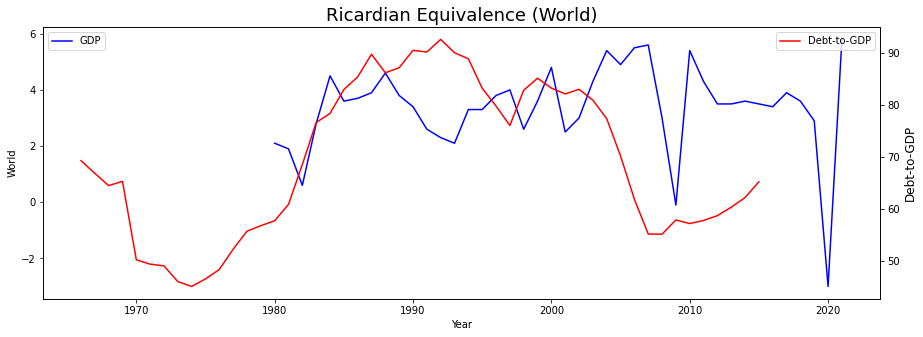

In [0]:
#line plot to show World trends in GDP growth and debt-to-GDP ratio


fig, ax1 = plt.subplots(figsize=(15,5))
#create second axis
ax2 = ax1.twinx()

sns.lineplot(x="Year", y = "World", color = "b", data = df_GDP, label = "GDP", ax=ax1)
sns.lineplot(x="Year", y = "World Average", color = "r", data = df_Debt, label = "Debt-to-GDP", ax=ax2)

#ax2.plt.ylabel("GDP")
plt.title('Ricardian Equivalence (World)', fontsize=18)
plt.ylabel('Debt-to-GDP', fontsize=12)

###Conclusions
- From the graph above, we can see that globally, there is no clear linear relationship between GDP growth and debt-to-GDP ratio.

- We observe time periods were GDP growth rises as debt-to-GDP falls as in about 1994-1998. We also see periods were GDP growth falls as debt-to-GDP rises, as in about 1988-1994



###Country Case Study - United States

In this section, we investigate the Ricardian Equivalence theory using United States as a case study

Text(0, 0.5, 'Debt-to-GDP')

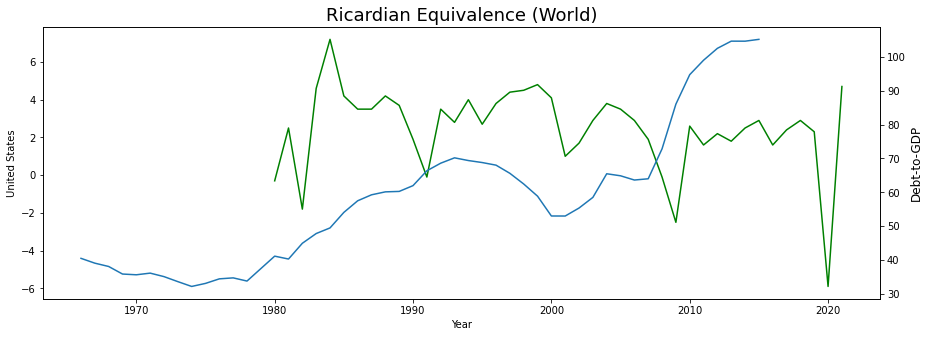

In [0]:
#line plot to observe debt and GDP over time for individual country

#check if data is available in both datasets
country = "United States"    
if country not in df_GDP.columns or country not in df_Debt.columns:
    print(country, "data not available")

plt.figure(figsize=(15,5))
      
sns.lineplot(x="Year", y = country, color = "g", data = df_GDP)
#create second y axis
ax2 = plt.twinx()
sns.lineplot(x="Year", y = country, data = df_Debt)

plt.title('Ricardian Equivalence (United States)', fontsize=18)
plt.ylabel('Debt-to-GDP', fontsize=12)

0    1980
1    1981
2    1982
3    1983
4    1984
Name: Year, dtype: int64


Text(0, 0.5, 'GDP')

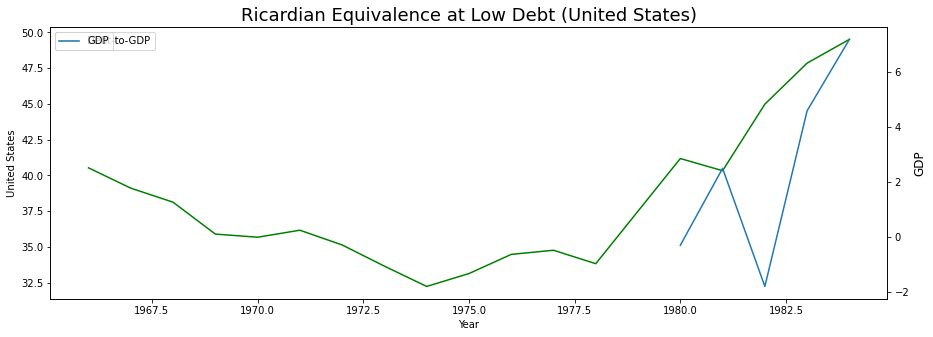

In [0]:
#line plot to observe to observe GDP and debt for low levels of debt

df_temp = df_Debt[df_Debt[country] < 50]
year_list = df_temp["Year"].to_list()
df_temp2 = df_GDP[df_GDP['Year'].isin(year_list)]
#df_GDP[df_GDP["Year"] == df_temp["Year"] ]
#print(df_temp[country])
print(df_temp2["Year"])
plt.figure(figsize=(15,5))
      
sns.lineplot(x="Year", y = country, color = "g", data = df_temp, label = "Debt-to-GDP")
#create second y axis
ax2 = plt.twinx()
sns.lineplot(x="Year", y = country, data = df_temp2, label = "GDP")

plt.title('Ricardian Equivalence at Low Debt (United States)', fontsize=18)
plt.ylabel('GDP', fontsize=12)

By observing low observations of debt-GDP (<50%), we can see clearly the relationship at low levels of GDP:
- As we can see, there is still no clear relationship. When GDP rises, the debt ratio falls in 1980 but rises in 1982

Text(0, 0.5, 'GDP')

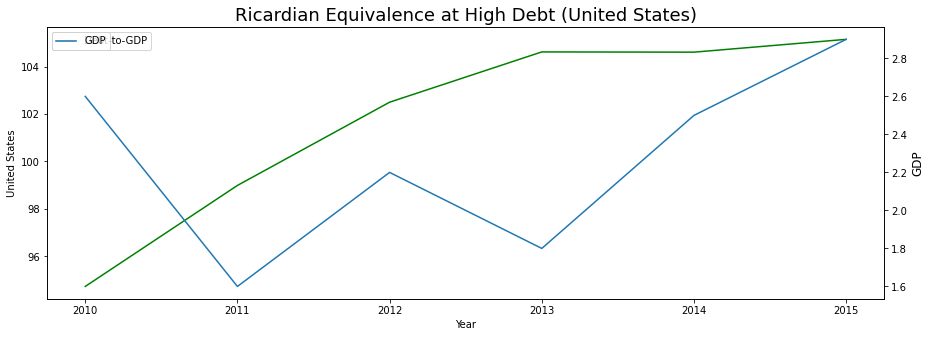

In [0]:
#line plot to observe to observe GDP and debt for high levels of debt

df_temp = df_Debt[df_Debt[country] > 90]
year_list = df_temp["Year"].to_list()
df_temp2 = df_GDP[df_GDP['Year'].isin(year_list)]
#df_GDP[df_GDP["Year"] == df_temp["Year"] ]
#print(df_temp[country])
plt.figure(figsize=(15,5))
      
sns.lineplot(x="Year", y = country, color = "g", data = df_temp, label = "Debt-to-GDP")
#create second y axis
ax2 = plt.twinx()
sns.lineplot(x="Year", y = country, data = df_temp2, label = "GDP")

plt.title('Ricardian Equivalence at High Debt (United States)', fontsize=18)
plt.ylabel('GDP', fontsize=12)

- as we can see, there is no relationship at high levels of debt. The debt-to-GDP ratio is consistently rising but the GDP growth rate rises and falls between this same period


 


##Final conclusion

From this analysis, I believe that we can conclude we did not find sufficient evidence to support the Ricardian Equivalence theory. We would have no reason to expect any relationship between economiic performance and public debt.